# Video 2.4 - Solving our problem using DBSCAN

### To perform clustering using DBSCAN you will be following these steps:

1) __Load the Dataset:__ Import the dataset into the Jupyter notebook environment.

2) __Feature Selection:__ Choose the features from the dataset that are relevant for the problem statement.

3) __Pre-process the data:__ Use appropriate pre-processing measures for the problem statement.

4) __Apply DBSCAN Clustering:__ Use the DBSCAN algorithm to cluster the data based on the different number of clusters.

5) __Find Optimal values:__ Find the optimal value for eps using k-plot and set the min_samples

6) __Evaluate and Interpret the Clusters:__ Analyze and interpret the clusters by plotting different features with cluster labels.

###  Import the necessary libraries 


In [1]:
import pandas as pd

### Step1: Load the dataset

In [2]:
data_preprocessed = pd.read_csv('data_preprocessed.csv')
data_preprocessed

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,...,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline,Units_sold>1000
0,SKU1539,2022-04-09,5835.0,46006,22.214389,2071,Skincare,99.0,72.0,194.0,...,0.000000,1271.0,3102.448115,238075.0,6.0,3479.0,40244.28,3856872.0,2.0,1
1,SKU1431,2021-05-08,1881.0,8084,11.870778,681,Skincare,118.0,73.0,200.0,...,0.000000,494.0,1723.716359,75868.0,2.0,0.0,0.00,0.0,0.0,0
2,SKU995,2022-12-24,2477.0,24190,27.645714,875,Makeup,108.0,85.0,232.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0
3,SKU1136,2022-10-08,4087.0,23588,16.896848,1396,Makeup,82.0,64.0,167.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,1
4,SKU528,2022-03-26,1446.0,13446,16.357664,822,Hair Care,29.0,24.0,88.0,...,0.000000,0.0,0.000000,0.0,0.0,6024.0,77040.81,7539723.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19626,SKU199,2021-12-11,4218.0,21416,14.769655,1450,Makeup,156.0,116.0,315.0,...,0.000000,918.0,3788.674296,139251.0,2.0,0.0,0.00,0.0,0.0,1
19627,SKU800,2022-08-20,2768.0,24035,30.347222,792,Makeup,163.0,110.0,322.0,...,735.407892,1376.0,6570.373597,233924.0,6.0,0.0,0.00,0.0,0.0,0
19628,SKU1474,2022-12-31,4977.0,24313,23.355427,1041,Makeup,177.0,127.0,326.0,...,0.000000,521.0,1644.101132,60831.0,2.0,0.0,0.00,0.0,0.0,1
19629,SKU291,2022-01-22,8202.0,34176,16.446583,2078,Makeup,0.0,0.0,0.0,...,0.000000,792.0,2310.693285,203561.0,2.0,3219.0,40244.28,3856872.0,2.0,1


### Step2: Feature Selection: Create an aggregated dataset and GroupBy SKU_ID

In [3]:
# Define the aggregation operations
aggregation = {
    
    'Page_traffic':'last',
    'Organic Search Rank': 'last',
    'Image_Count': 'last',
    'Bullet_Count': 'last',
    'Title_Count': 'last',
    'Description_Length': 'last',
    '1_Star_Rating': 'last',
     '2_Star_Rating': 'last',
     '3_Star_Rating': 'last',
     '4_Star_Rating': 'last',
     '5_Star_Rating': 'last',
    'Unit_price':'last',
    'Revenue($)': 'sum',
}

In [4]:
# Group by 'SKU_ID' and aggregate
# data_selected = data_preprocessed.groupby('SKU_ID').agg(aggregation).reset_index()
data_selected = data_preprocessed.groupby('SKU_ID').agg(aggregation)
data_selected

,Page_traffic,Organic Search Rank,Image_Count,Bullet_Count,Title_Count,Description_Length,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Unit_price,Revenue($)
SKU_ID,,,,,,,,,,,,,
SKU1011,3903.0,19.0,5.0,5.0,91.0,59.0,49.0,38.0,81.0,179.0,1227.0,6.612984,1805434
SKU1014,598.0,31.0,0.0,5.0,79.0,99.0,55.0,26.0,64.0,118.0,691.0,20.099526,0
SKU1024,4090.0,37.0,0.0,8.0,163.0,158.0,48.0,34.0,92.0,205.0,1494.0,12.659214,2340227
SKU1025,5760.0,3.0,2.0,6.0,90.0,62.0,33.0,12.0,52.0,122.0,917.0,12.289088,2432316
SKU1036,3088.0,36.0,12.0,8.0,126.0,221.0,140.0,78.0,228.0,474.0,3479.0,18.474910,2839170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
SKU968,875.0,19.0,9.0,5.0,85.0,56.0,57.0,39.0,116.0,273.0,1803.0,20.905660,0
SKU978,655.0,33.0,0.0,8.0,167.0,158.0,0.0,0.0,0.0,38.0,172.0,14.686888,2211515
SKU989,583.0,28.0,13.0,6.0,62.0,122.0,162.0,107.0,277.0,571.0,3809.0,20.905660,0


### Step3: Pre-process the data:  Use appropriate pre-processing measures for the problem statement

In [5]:
from sklearn.preprocessing import StandardScaler

# Standardize the numerical columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# Create a DataFrame for the scaled data
data_scaled = pd.DataFrame(data_scaled, columns=data_selected.columns, index = data_selected.index)

# Show the first few rows of the scaled DataFrame
data_scaled.head()


,Page_traffic,Organic Search Rank,Image_Count,Bullet_Count,Title_Count,Description_Length,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Unit_price,Revenue($)
SKU_ID,,,,,,,,,,,,,
SKU1011,0.677839,-0.058121,-0.411446,-1.576290,-0.551930,-1.284448,-0.272962,-0.177348,-0.377795,-0.313058,-0.263131,-1.727217,-0.062109
SKU1014,-1.121082,0.990253,-1.427309,-1.576290,-0.962336,-0.632472,-0.159208,-0.495841,-0.540692,-0.595646,-0.637991,-0.151948,-1.624228
SKU1024,0.779623,1.514440,-1.427309,1.486582,1.910506,0.329194,-0.291921,-0.283512,-0.272391,-0.192611,-0.076401,-1.020999,0.400611
SKU1025,1.688609,-1.455953,-1.020964,-0.555332,-0.586131,-1.235550,-0.576307,-0.867416,-0.655678,-0.577116,-0.479935,-1.064231,0.480290
SKU1036,0.234232,1.427076,1.010763,1.486582,0.645087,1.356056,1.452308,0.884296,1.030787,1.053556,1.311841,-0.341708,0.832313


In [6]:
data_scaled.shape

(239, 13)

### Step4: Apply DBSCAN Clustering

In [7]:
from sklearn.neighbors import NearestNeighbors

# Use Nearest Neighbors to find distances to the 26th nearest neighbor
nn = NearestNeighbors(n_neighbors=26).fit(data_scaled)
distances, indices = nn.kneighbors(data_scaled)

In [8]:
import numpy as np

# Sort the distances
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
distances

array([0.53697889, 0.53697889, 0.53706317, 0.53706317, 0.57111797,
       0.57111797, 0.65310787, 0.65310787, 0.7745152 , 0.7745152 ,
       0.78219289, 0.78219289, 0.82753565, 0.82753565, 0.8618156 ,
       0.8618156 , 0.89213902, 0.90094542, 0.90418194, 0.90418194,
       0.96699498, 0.96699498, 0.96896225, 0.96896225, 0.97559779,
       0.97559779, 1.00031291, 1.01920605, 1.02703337, 1.03053501,
       1.03053501, 1.05739028, 1.05739028, 1.0796162 , 1.0796162 ,
       1.09512742, 1.10755602, 1.10755602, 1.11727174, 1.11727174,
       1.12795355, 1.12795355, 1.13274042, 1.13274042, 1.14700456,
       1.14700456, 1.15435062, 1.15435062, 1.19325533, 1.19443238,
       1.19598104, 1.19666232, 1.19666232, 1.19794438, 1.19794438,
       1.21602344, 1.21857501, 1.21857501, 1.21908007, 1.2382358 ,
       1.2382358 , 1.23941744, 1.24491908, 1.25324164, 1.254377  ,
       1.28253443, 1.28253443, 1.2851621 , 1.2851621 , 1.28719739,
       1.28719739, 1.29226708, 1.29322171, 1.30076126, 1.30076

## Step5: Find Optimal values for min_samples and eps

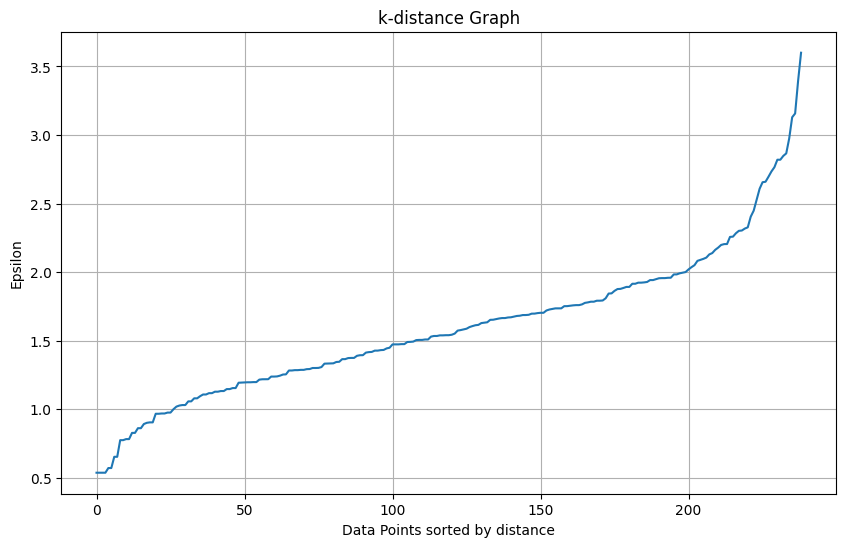

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(distances)
plt.title("k-distance Graph")
plt.xlabel("Data Points sorted by distance")
plt.ylabel("Epsilon")
plt.grid(True)
plt.show()

In [10]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=26)
data_scaled['DBSCAN_cluster'] = dbscan.fit_predict(data_scaled)
data_scaled

,Page_traffic,Organic Search Rank,Image_Count,Bullet_Count,Title_Count,Description_Length,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Unit_price,Revenue($),DBSCAN_cluster
SKU_ID,,,,,,,,,,,,,,
SKU1011,0.677839,-0.058121,-0.411446,-1.576290,-0.551930,-1.284448,-0.272962,-0.177348,-0.377795,-0.313058,-0.263131,-1.727217,-0.062109,0
SKU1014,-1.121082,0.990253,-1.427309,-1.576290,-0.962336,-0.632472,-0.159208,-0.495841,-0.540692,-0.595646,-0.637991,-0.151948,-1.624228,0
SKU1024,0.779623,1.514440,-1.427309,1.486582,1.910506,0.329194,-0.291921,-0.283512,-0.272391,-0.192611,-0.076401,-1.020999,0.400611,0
SKU1025,1.688609,-1.455953,-1.020964,-0.555332,-0.586131,-1.235550,-0.576307,-0.867416,-0.655678,-0.577116,-0.479935,-1.064231,0.480290,0
SKU1036,0.234232,1.427076,1.010763,1.486582,0.645087,1.356056,1.452308,0.884296,1.030787,1.053556,1.311841,-0.341708,0.832313,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SKU968,-0.970311,-0.058121,0.401245,-1.576290,-0.757133,-1.333346,-0.121290,-0.150807,-0.042418,0.122405,0.139703,-0.057789,-1.624228,0
SKU978,-1.090057,1.164982,-1.427309,1.486582,2.047308,0.329194,-1.201954,-1.185909,-1.153952,-0.966254,-1.000962,-0.784161,0.289246,-1
SKU989,-1.129247,0.728159,1.213936,-0.555332,-1.543745,-0.257585,1.869407,1.653987,1.500315,1.502917,1.542631,-0.057789,-1.624228,-1


In [11]:
# Check the number of clusters and noise points
cluster_counts = data_scaled['DBSCAN_cluster'].value_counts()

cluster_counts

 0    209
-1     30
Name: DBSCAN_cluster, dtype: int64